In [5]:
import sys,os
DPCOMP_PATH = '/nfs/avid/data1/miklau/dpcomp-parent/dpcomp_core_op'
sys.path.append(DPCOMP_PATH)
os.environ['DPCOMP_CORE']= DPCOMP_PATH

In [6]:
%matplotlib inline

In [7]:
import pandas
import seaborn as sns
import time 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# df= pandas.DataFrame({'index':range(4096),'value':range(4096)})

# start = time.time()
# sns.barplot(x="index",y="value", data = df)
# print(time.time()-start )

[1 0 3 ..., 1 2 0]
ORIGINAL dataframe created, now plotting


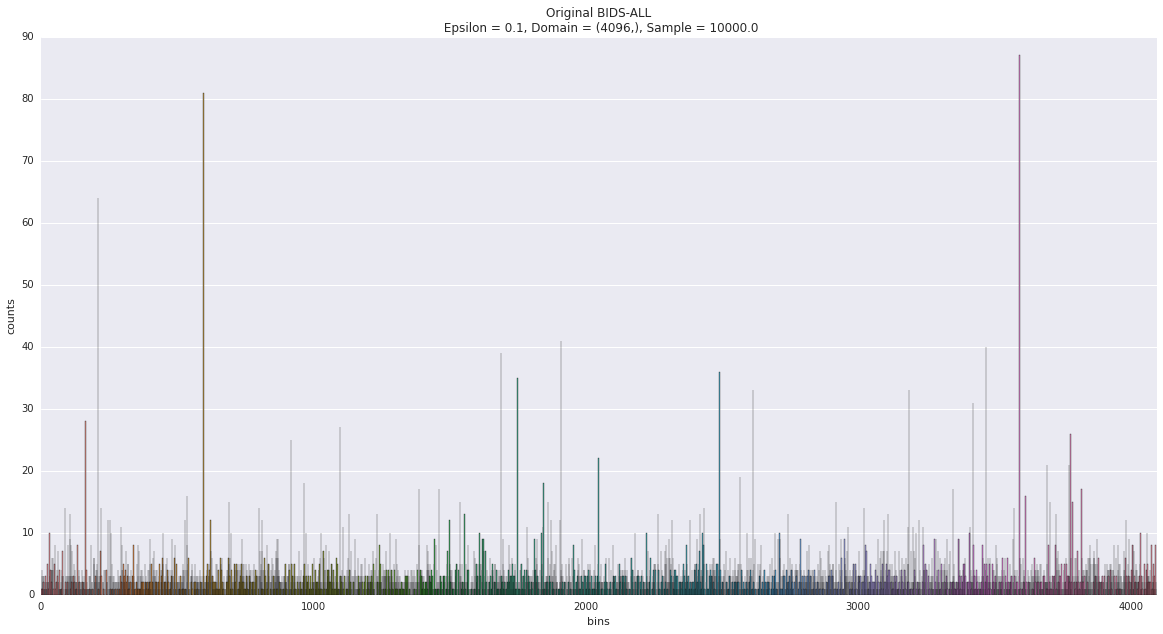

ORIGINAL PLOTTED
dataframe created, now plotting


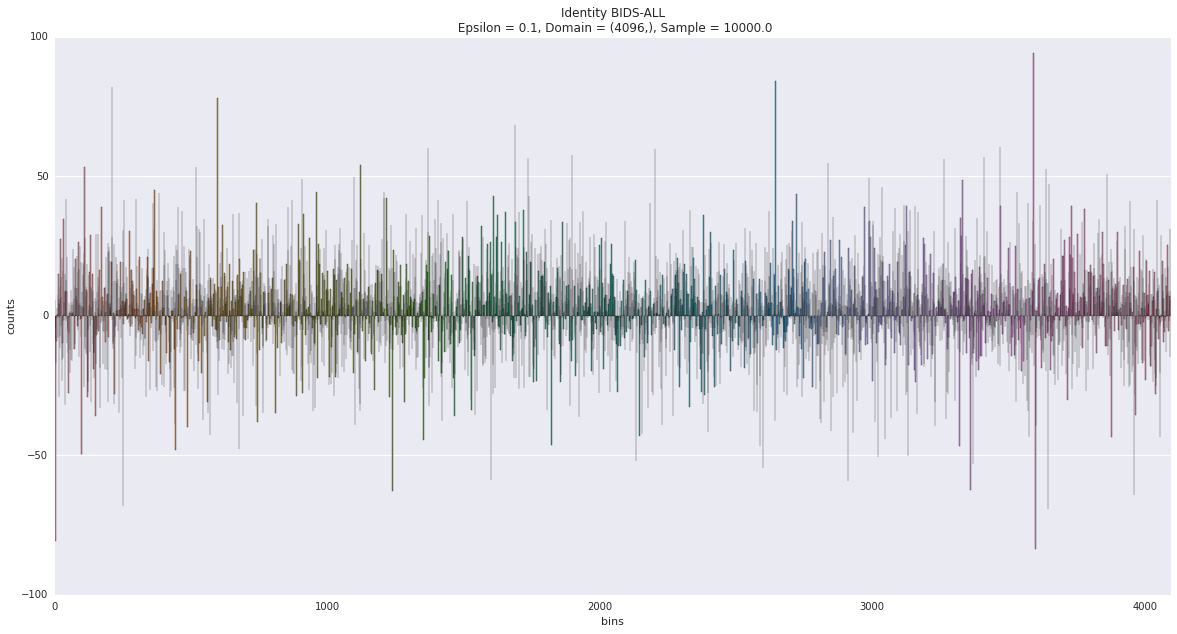

Identity PLOTTED
[ -8.14691089e-01   4.99508964e+00  -7.58337349e+01 ...,   9.63320521e+03
   9.66439166e+03   9.66965508e+03]
CDF dataframe created, now plotting


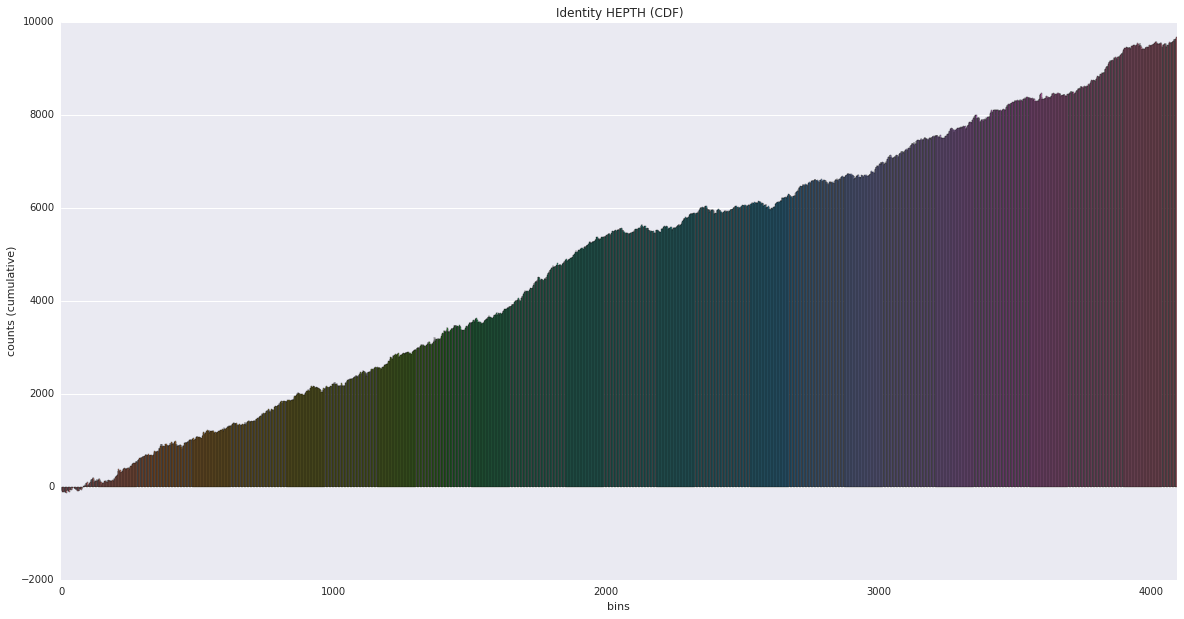

Identity CDF PLOTTED


In [9]:
from dpcomp_core.algorithm import *
from dpcomp_core import dataset
from dpcomp_core import util
from dpcomp_core import workload

import matplotlib.ticker as ticker

# number of bins
domain = (4096,)
epsilon = 0.1
nickname = 'BIDS-ALL'
# number of data points from sample_to_scale data generation
sample = 1e4
seed = 1

# Instantiate algorithm
a = identity.identity_engine()
# a = mwemND.mwemND_engine()

# Instantiate dataset
data = dataset.DatasetSampledFromFile(nickname=nickname, 
                                     sample_to_scale=sample, 
                                     reduce_to_dom_shape=domain, 
                                     seed=111)
# Instantiate workload
# w = workload.Prefix1D(domain_shape_int=domain)
w = workload.Identity(domain_shape=domain)

plt.clf()
plt.cla()
plt.close()
# Calculate and plot noisy estimates for x 
dat = data.payload
print dat
df = pd.DataFrame(dat)
x = df.index.values
y = df.values.flatten()
print "ORIGINAL dataframe created, now plotting"
orig = sns.barplot(x, y)
orig.set_xticks([0, 1000, 2000, 3000, 4000])
orig.set_xticklabels([0, 1000, 2000, 3000, 4000])
orig.set(xlabel='bins', ylabel='counts')
orig.set_title('Original %s \n Epsilon = %s, Domain = %s, Sample = %s' % (nickname, str(epsilon), str(domain), str(sample)))
sns.plt.show()
print "ORIGINAL PLOTTED"
plt.gcf().clear()

dat_identity = a.Run(w, dat, epsilon, seed)
df_identity = pd.DataFrame(dat_identity)
x_hat_identity = df_identity.index.values
y_hat_identity = df_identity.values.flatten()
print "dataframe created, now plotting"
identity = sns.barplot(x_hat_identity, y_hat_identity)
identity.set_xticks([0, 1000, 2000, 3000, 4000])
identity.set_xticklabels([0, 1000, 2000, 3000, 4000])
identity.set(xlabel='bins', ylabel='counts')
# identity.set_title('Identity HEPTH')
identity.set_title('Identity %s \n Epsilon = %s, Domain = %s, Sample = %s' % (nickname, str(epsilon), str(domain), str(sample)))
sns.plt.show()
print "Identity PLOTTED"
plt.gcf().clear()

datCDF= np.cumsum(dat_identity)
print datCDF

df_CDF = pd.DataFrame(datCDF)
x_hat_CDF = df_CDF.index.values
y_hat_CDF = df_CDF.values.flatten()
print "CDF dataframe created, now plotting"
identity = sns.barplot(x_hat_CDF, y_hat_CDF)
identity.set_xticks([0, 1000, 2000, 3000, 4000])
identity.set_xticklabels([0, 1000, 2000, 3000, 4000])
identity.set(xlabel='bins', ylabel='counts (cumulative)')
identity.set_title('Identity HEPTH (CDF)')
sns.plt.show()
print "Identity CDF PLOTTED"
plt.gcf().clear()
